In [67]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [35]:
tickers = ['TATAMOTORS.NS', 'HDFCBANK.NS', 'CIPLA.NS', 'INFY.NS', 'ONGC.NS','ITC.NS']

In [36]:
data = yf.download(tickers, start='2018-01-01', end='2021-12-31')['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [37]:
# Calculating logarithmic returns
returns = np.log(data / data.shift(1))

In [38]:
returns.tail()

,CIPLA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,ONGC.NS,TATAMOTORS.NS
Date,,,,,,
2021-12-24,-0.001595,-0.003607,0.003171,0.003216,-0.014337,-0.010107
2021-12-27,0.023879,0.008236,0.001421,-0.002066,-0.008338,0.007563
2021-12-28,0.003273,0.006869,0.011641,0.011426,0.015532,0.019026
2021-12-29,0.002408,-0.004769,-0.001299,-0.015110,-0.004310,-0.008785
2021-12-30,0.018218,0.005248,0.003864,-0.003466,0.011453,-0.011834


In [39]:
cov_matrix = returns.cov()
cov_matrix.tail()

,CIPLA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,ONGC.NS,TATAMOTORS.NS
HDFCBANK.NS,0.000036,0.000293,0.000092,0.000105,0.000107,0.000195
INFY.NS,0.000072,0.000092,0.000337,0.000065,0.000094,0.000147
ITC.NS,0.000066,0.000105,0.000065,0.000311,0.000155,0.000186
ONGC.NS,0.000082,0.000107,0.000094,0.000155,0.000597,0.000311
TATAMOTORS.NS,0.000106,0.000195,0.000147,0.000186,0.000311,0.001068


In [40]:
correlation_matrix = returns.corr()
correlation_matrix.tail()

,CIPLA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,ONGC.NS,TATAMOTORS.NS
HDFCBANK.NS,0.114727,1.000000,0.291735,0.346779,0.255081,0.349343
INFY.NS,0.214430,0.291735,1.000000,0.201815,0.209522,0.244920
ITC.NS,0.203354,0.346779,0.201815,1.000000,0.360258,0.323013
ONGC.NS,0.181859,0.255081,0.209522,0.360258,1.000000,0.389026
TATAMOTORS.NS,0.176322,0.349343,0.244920,0.323013,0.389026,1.000000


In [41]:
volatility = np.sqrt(np.diag(cov_matrix))
volatility

array([0.01834263, 0.0171244 , 0.01836802, 0.01762951, 0.02443805,
       0.03267692])

In [42]:
exp_returns=data.resample('Y').last().pct_change().mean()
exp_returns

CIPLA.NS         0.271109
HDFCBANK.NS      0.120099
INFY.NS          0.484812
ITC.NS          -0.042665
ONGC.NS          0.098569
TATAMOTORS.NS    0.541225
dtype: float64

In [48]:
num_portfolios = 50000

# Initializing arrays to store portfolio returns, volatility, and weights
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatility = np.zeros(num_portfolios)
weights_record = np.zeros((num_portfolios, len(tickers)))

# Performing Monte Carlo simulation
for i in range(num_portfolios):
    # Generating random portfolio weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    # Saving weights
    weights_record[i, :] = weights
    
    # Calculating portfolio returns and volatility
    portfolio_returns[i] = np.sum(returns.mean() * weights)
    portfolio_volatility[i] = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

In [51]:
# Creating a DataFrame to store portfolio statistics
portfolio_data = {'Returns': portfolio_returns, 'Volatility': portfolio_volatility}
for i, ticker in enumerate(tickers):
    portfolio_data[ticker + ' Weight'] = weights_record[:, i]
df = pd.DataFrame(portfolio_data)


In [52]:
# Finding the portfolio with the highest Sharpe ratio
max_sharpe_ratio = df['Returns'] / df['Volatility']
max_sharpe_idx = max_sharpe_ratio.idxmax()
optimal_weights = df.iloc[max_sharpe_idx, 2:]

In [56]:
print("Optimal Portfolio Weights:")
print(optimal_weights)


Optimal Portfolio Weights:
TATAMOTORS.NS Weight    0.187731
HDFCBANK.NS Weight      0.074765
CIPLA.NS Weight         0.609940
INFY.NS Weight          0.044434
ONGC.NS Weight          0.050017
ITC.NS Weight           0.033113
Name: 44227, dtype: float64


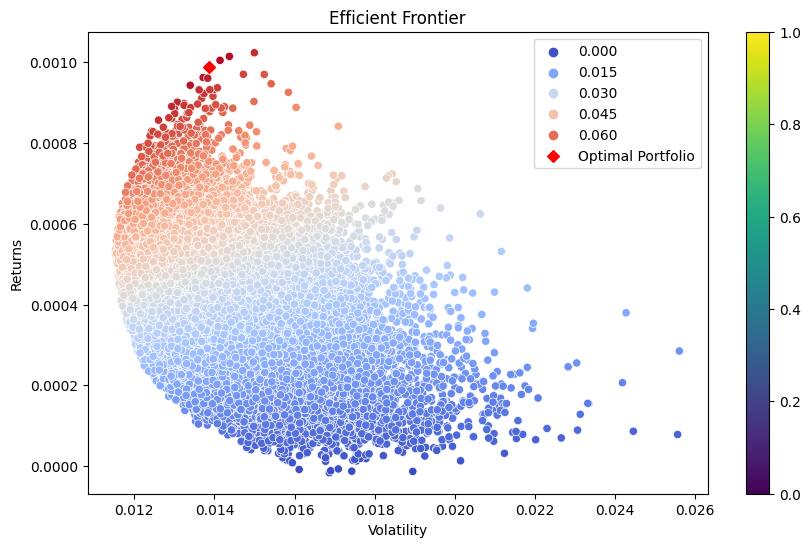

In [66]:

# Plot the efficient frontier using Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=portfolio_volatility, y=portfolio_returns, hue=portfolio_returns / portfolio_volatility, palette='coolwarm', marker='o')
scatter.set_xlabel('Volatility')
scatter.set_ylabel('Returns')
scatter.set_title('Efficient Frontier')
plt.scatter(df.loc[max_sharpe_idx, 'Volatility'], df.loc[max_sharpe_idx, 'Returns'], c='red', marker='D', label='Optimal Portfolio')
plt.legend()
plt.colorbar()

plt.show()